# Convolución
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/
* *ipywidgets*: Esta biblioteca proporciona herramientas interactivas para crear widgets en Jupyter Notebooks y JupyterLab. El sitio oficial es https://jupyter.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Teoría

### Integral de convolución

La integral de convolución se define como:
$$
\mathscr{s}(t)\:=\:\int_{-\infty}^{\infty}{\mathscr{e}(\tau)\mathscr{h}(t-\tau)}d\tau \:=\: \mathscr{e}(t)*\mathscr{h}(t) 
$$
Donde en este caso
* $\mathscr{e}(t)$ es la función de entrada
* $\mathscr{h}(t)$ es la función de transferencia
* y "$*$" es el operador de convolución
<center><img src="/E:\Codigos_linux\APython\NotebooksP_AEdS\Tema_4\ani_intconv.gif" alt="Integral de convolución, ejemplo" />

### Evaluación gráfica

In [2]:
# Función para la primera gráfica
def caja1(t):
    return np.where((t >= 0) & (t <= 1), 0.5, 0)

# Función para la segunda gráfica
def caja2(t, desp):
    return np.where((t >= -1+desp) & (t <= 0+desp), 1, 0)

Sean $\mathscr{e}(t)$ y $\mathscr{h}(\tau)$ dos funciones representadas por las siguientes figuras.
<center><img src="/E:\Codigos_linux\APython\NotebooksP_AEdS\Tema_4\Paso1_EvGraf.png" alt="Paso 1" />

Para realizar la convolución es necesario reemplazar la variable $t$ por $\tau$, lo cual no altera a la función ya que sólo estamos cambiando el nombre de la variable, por lo que ahora tenemos $\mathscr{e}(\tau)$ y $\mathscr{h}(\tau)$.
<center><img src="/E:\Codigos_linux\APython\NotebooksP_AEdS\Tema_4\Paso2_EvGraf.png" alt="Paso 2" />

#### Paso 1: Plegamiento

Como primer paso plegamos la función $\mathscr{h}(\tau)$ para obtener su imagen con lo cual tenemos $\mathscr{h}(-\tau)$
<center><img src="/E:\Codigos_linux\APython\NotebooksP_AEdS\Tema_4\Paso3_EvGraf.png" alt="Paso 3" />

#### Paso 2: Desplazamiento

Ahora la desplazamos un intervalo $t$ de manera que nuestra función ahora la representamos como $\mathscr{h}(t-\tau)$
<center><img src="/E:\Codigos_linux\APython\NotebooksP_AEdS\Tema_4\Paso4_EvGraf.png" alt="Paso 4" />

#### Paso 3: Multiplicación

Para realizar la convolución, como se establece en la definición, es necesario multiplicar la función $\mathscr{e}(\tau)$ por cada valor desplazado de la función $\mathscr{h}(t-\tau)$ e integrar el producto. El valor de desplazamiento del desplazamiento t se toma de $-\infty$ a $\infty$.<br>
Para nuestro ejemplo, si tomamos un desplazamiento cada $0.25$, podemos observar graficamente como se va comportando nuestra convolución en estos puntos. Por ejemplo, si se tiene un desplazamiento $t = 0$, el area de las dos funciones es cero.

##### Codigo 1

In [3]:
def calcular_s(t, desp):
    if t < 0 or t > 2:
        return 0
    elif 0 <= t <= 1:
        return 0.5 * desp
    else:
        return 0.5 * (2 - desp)

In [ ]:
def grafica_interactiva(desp):
    # Crear la gráfica
    fig, ax = plt.subplots(figsize=(6, 6))

    # Crear las funciones
    t = np.linspace(-3, 3, 1000)
    linea1, = ax.plot(t, caja1(t), color='blue', label='e(τ)')
    linea2, = ax.plot(t, caja2(t, desp), color='red', label='e(t-τ)')

    # Colorear áreas de empalme
    mascara = (t >= -1+desp) & (t <= 0+desp) & (t >= 0) & (t <= 1)
    ax.fill_between(t, caja1(t), where=mascara, color='green', alpha=0.5)

    # Configuración de gráfica
    ax.set_title('Función de transferencia', fontsize=12, fontweight='bold')
    ax.set_xlabel('τ', fontsize=12, fontweight='bold')
    ax.set_ylabel('s(t)', fontsize=12, fontweight='bold')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 1.5)
    ax.set_xticks(np.arange(-2, 3)) 
    ax.text(-3, -0.1, '$-\infty$', ha='center', va='bottom')
    ax.text(3, -0.1, '$+\infty$', ha='center', va='bottom')

    # Etiquetas personalizadas para la leyenda
     # Etiquetas personalizadas para la leyenda
    etiquetas_lineas = ['e(τ)', 'e(t-τ)']
    s = calcular_s(desp, desp)
    etiquetas_info = [
        f't = {desp:.2f}', 
        f's({desp:.2f}) = (0.5)*({desp:.2f}) = {s:.3f}'
    ]

    plt.legend(etiquetas_lineas, loc='upper right')
    ax.text(0.05, 0.9, '\n'.join(etiquetas_info), transform=ax.transAxes, fontsize=10)

    plt.show()

# Crear widget deslizante para modificar p1
widget = widgets.FloatSlider(
    value=0,
    min=-3,
    max=3,
    step=0.25,
    description='Valor de t:',
    continuous_update=True
)

# Vincular el widget con la función actualizar_grafica
widgets.interactive(grafica_interactiva, desp=widget)

<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\i'
<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Marcos\AppData\Local\Temp\ipykernel_3716\371679807.py:21: SyntaxWarning: invalid escape sequence '\i'
  ax.text(-3, -0.1, '$-\infty$', ha='center', va='bottom')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_3716\371679807.py:22: SyntaxWarning: invalid escape sequence '\i'
  ax.text(3, -0.1, '$+\infty$', ha='center', va='bottom')


interactive(children=(FloatSlider(value=0.0, description='Valor de t:', max=3.0, min=-3.0, step=0.25), Output(…

In [5]:
def grafica_interactiva2(desp):
    # Crear la gráfica
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    ax1, ax2, ax3 = axs

    # Crear las funciones
    t = np.linspace(-3, 3, 1000)
    linea1, = ax1.plot(t, caja1(t), color='blue', label='e(τ)')
    linea2, = ax1.plot(t, caja2(t, desp), color='red', label='e(t-τ)')

    # Colorear áreas de empalme
    mascara = (t >= -1+desp) & (t <= 0+desp) & (t >= 0) & (t <= 1)
    ax1.fill_between(t, caja1(t), where=mascara, color='green', alpha=0.5)

    # Configuración de gráfica
    ax1.set_title('Función de transferencia', fontsize=12, fontweight='bold')
    ax1.set_xlabel('t', fontsize=12, fontweight='bold')
    ax1.set_ylabel('s(t)', fontsize=12, fontweight='bold')
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(0, 1.5)
    ax1.set_xticks(np.arange(-2, 3)) 
    ax1.text(-3, -0.1, '$-\infty$', ha='center', va='bottom')
    ax1.text(3, -0.1, '$+\infty$', ha='center', va='bottom')

    # Etiquetas personalizadas para la leyenda
    etiquetas_lineas = ['e(τ)', 'h(t-τ)']
    s = calcular_s(desp,desp)
    etiquetas_info = [
        f't = {desp:.2f}', 
        f's = {s:.3f}'
    ]

    ax1.legend(etiquetas_lineas, loc='upper right')
    ax1.text(0.05, 0.9, '\n'.join(etiquetas_info), transform=ax1.transAxes, fontsize=10)

    # Gráfica de s vs t
    t_s = np.linspace(-3, 3, 1000)
    ax2.clear()  # Limpia la gráfica anterior
    ax2.set_title('Convolución', fontsize=12, fontweight='bold')
    ax2.set_xlabel('t', fontsize=12, fontweight='bold')
    ax2.set_ylabel('s(t)', fontsize=12, fontweight='bold')
    ax2.set_xlim(-3, 3)
    ax2.set_ylim(0, 1)
    ax2.set_xticks(np.arange(-2, 3)) 
    ax2.set_yticks(np.arange(0, 2,0.25))
    ax2.text(-3, -0.1, '$-\infty$', ha='center', va='bottom')
    ax2.text(3, -0.1, '$+\infty$', ha='center', va='bottom')

    # Actualizar gráfica 2
    idx = int((desp + 3) / 6 * len(t_s))  # Índice para slicing
    s_values = [calcular_s(ti,ti) for ti in t_s[:idx]]  # Valores de s hasta idx
    ax2.plot(t_s[:idx], s_values, label='s(t)', color='purple')  # Gráfica hasta idx
    ax2.legend()

    # Tabla
    ax3.axis('off')  # Desactiva ejes
    ax3.set_title('Tabla de valores', fontsize=12, fontweight='bold')

    # Generar valores de desp y s
    desp_values = np.arange(0, 2.25, 0.25)
    s_values = [calcular_s(d,d) for d in desp_values]

    # Actualizar tabla
    tabla = ax3.table(
        cellText=np.round(np.column_stack((desp_values, s_values)), 3),
        colLabels=['t', 's(t)'],
        loc='center'
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)

    # Resaltar fila actual
    fila_actual = int(desp / 0.25)
    tabla[(fila_actual+1, 0)].set_facecolor('yellow')
    tabla[(fila_actual+1, 1)].set_facecolor('yellow')


    plt.tight_layout()
    plt.show()

# Crear widget deslizante para modificar p1
widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=2,
    step=0.25,
    description='Valor de t:',
    continuous_update=True
)

# Vincular el widget con la función actualizar_grafica
widgets.interactive(grafica_interactiva2, desp=widget)

<>:22: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:46: SyntaxWarning: invalid escape sequence '\i'
<>:47: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\i'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:46: SyntaxWarning: invalid escape sequence '\i'
<>:47: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Marcos\AppData\Local\Temp\ipykernel_3716\3433802817.py:22: SyntaxWarning: invalid escape sequence '\i'
  ax1.text(-3, -0.1, '$-\infty$', ha='center', va='bottom')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_3716\3433802817.py:23: SyntaxWarning: invalid escape sequence '\i'
  ax1.text(3, -0.1, '$+\infty$', ha='center', va='bottom')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_3716\3433802817.py:46: SyntaxWarning: invalid escape sequence '\i'
  ax2.text(-3, -0.1, '$-\infty$', ha='center', va='bottom')
C:\Users\Marcos\AppData\Local\Temp\ipykernel_3716\3433802817.py:47: SyntaxWar

interactive(children=(FloatSlider(value=0.0, description='Valor de t:', max=2.0, step=0.25), Output()), _dom_c…

### Evaluación Analítica

Los valores de la convolucion para las dos funciones anteriores son facilmente obtenidos a través de una evaluación gráfica en puntos definidos; sin embargo, cuando se tienen otros tipos de funciones, el obtener estos valores se complica, por lo que es necesario deducirlos de manera analítica.<br><br>
Para la evalución analítica de la operación de la convolución entre dos funciones se siguen los pasos 1, 2 y 3 de la evalución gráfica; sin embargo, para la etapa final de integración se requiere la evaluación analítica de una integral definida, por lo que es necesario fijar adecuadamente los limites de integración .<br><br>
Para determinar los limites de integración de la convolución primero se investigan los valores mínimos de $\tau$, para los cuales las funciones $\mathscr{e}(\tau)$ y $\mathscr{h}(t-\tau)$ son no nulos, y se selecciona como límite inferior de la integral el mayor de los dos; a continuación se investigan los valores máximos de $\tau$, para los cuales las funciones $\mathscr{e}(\tau)$ y $\mathscr{h}(t-\tau)$ son no nulos, y se selecciona como límite superior al menor de los dos. Para la obtención de estos límites, nos auxiliaremos de la gráfica de la convolución de las funciones

Utilizando las funciones del ejercicio anterior, tenemos que para<br>
<center><img src="/E:\Codigos_linux\APython\NotebooksP_AEdS\Tema_4\1_EvAnalitc.png" alt="Paso 1" /><br>

|  | Límite inferior | Límite superior |
|-----------|-----------|-----------|
| $e(\tau)$ | 0 | 1 |
| $h(t-\tau)$ | t-1 | t|

Por lo que los límites de la integral definida irán variando como sigue:
$$
\mathscr{s}(t) = 
\begin{cases}
0; & t\leq 0; & \text{Ya que no existe intersección entre las funciones, por lo que el producto es cero}\\
\int_{0}^{t}; & 0 < t \leq 1; & \text{Ya que para este intervalo el límite mayor entre 0 y t-1 es 0, y el menor entre 1 y t es t} x < 0\\
\int_{t-1}^{1}; & 1<t\leq 2; & \text{Ya que para este intervalo el límite mayor entre 0 y t-1 es t-1, y el menor entre 1 y t es 1}\\
0; & t>2; & \text{Para t>2 no existe intersección entre las dos funciones, por lo que el producto es cero}
\end{cases}
$$

Si resolvemos analíticamente
$$
\mathscr{s}(t)=\int_{-\infty}^{\infty}{\mathscr{e}(\tau)\;\mathscr{h}(t-\tau)}\;dt\\
\\[1cm]
I_1 = \int_{0}^{t}{\left(\frac{1}{2}\right)(1)}dt=\frac{1}{2}\int_{0}^{t}dt = \frac{1}{2}(t-0)=\frac{1}{2}t\\
\\[0.5cm]
I_2 = \int_{t-1}^{1}{\left(\frac{1}{2}\right)(1)}dt=\frac{1}{2}\int_{0}^{t}dt = \frac{1}{2}(1-t+1)=1-\frac{1}{2}t
$$
por lo que
$$
\mathscr{s}(t) = 
\begin{cases}
0; & t\leq 0 \\
\frac{1}{2}t; & 0 < t \leq 1 \\
1-\frac{1}{2}t; & 1<t\leq 2 \\
0; & t>2
\end{cases}
$$

### Propiedades de la integral de convolución

La convolución de dos funciones tiene la propiedad de ser una **operación conmotutativa**, esto es:
$$
\alpha_1(t) * \alpha_2(t) = \alpha_2(t) * \alpha_1(t)
$$
donde $*$ representa a la operación de convolución de $\alpha_1(t) * \alpha_2(t)$

### Teorema de la convolución

Una de las herramientas más importantes para el análisisde los sistemas lineales se debe a la relación que existe entre la *transformada de Fourier* y la *operación de convolución*. A esta relación se le conoce como **teorema de la convolución**.

Si
$$
\mathscr{F} \{\mathscr{h}_1(t)\} = H_1(\mathscr{f})\qquad\text{y}\qquad\mathscr{F} \{\mathscr{h}_2(t)\} = H_2(\mathscr{f})
$$

Teorema de la convolución en el dominio del tiempo
$$
\mathscr{F} \{\mathscr{h}_1(t) * \mathscr{h}_2(t)\} = H_1(\mathscr{f}) \cdot H_2(\mathscr{f})
$$
Teorema de la convolución en el dominio de la frecuencia
$$
\mathscr{F} \{\mathscr{h}_1(t) \cdot \mathscr{h}_2(t)\} = H_1(\mathscr{f}) * H_2(\mathscr{f})
$$

## Ejemplo 4.1 de las notas de Anguino

In [51]:
# Función para la primera gráfica
def caja1(t):
    return np.where((t >= 0) & (t <= 1), 0.5, 0)

# Función para la segunda gráfica
def caja2(t):
    return np.where((t >= 0) & (t <= 1), 1, 0)

In [52]:
# Vector tiempo
t = np.linspace(-1,3, 100)

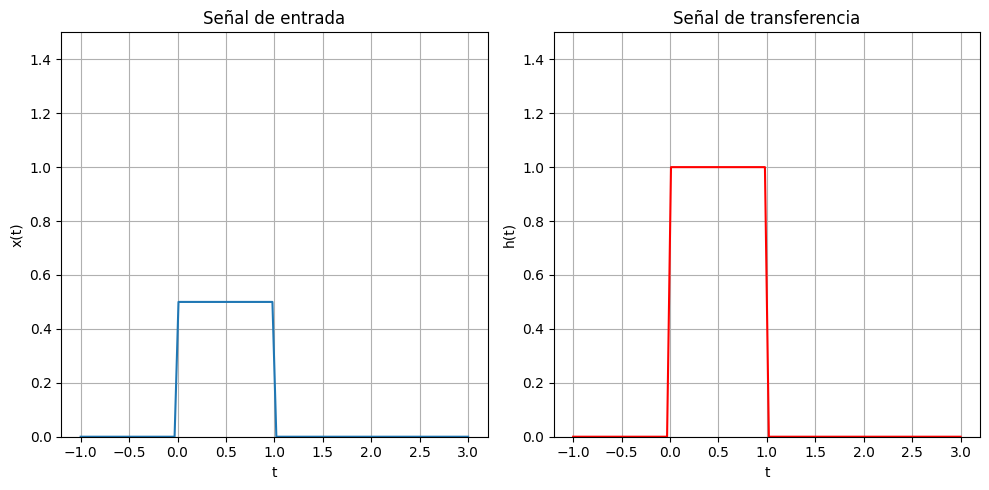

In [53]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Señal de entrada')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.ylim(0,1.5)
plt.plot(t,caja1(t))
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Señal de transferencia')
plt.xlabel("t")
plt.ylabel("h(t)")
plt.ylim(0,1.5)
plt.plot(t,caja2(t), c = 'red')
plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
#Construimos una función que genere una convolución entre dos señales
def conv(f1, f2):
    M = len(f1) + len(f2) - 1  # Longitud de la señal de salida
    fs = np.zeros(M) # Inicializamos y como un vector de ceros
    
    # Realizamos la convolución
    for n in range(M): # Itera sobre cada posición n en la señal de salida y
        for i in range(len(f1)): #Itera sobre cada posición i en la señal de entrada x y el desplazamiento de h
            if n - i >= 0 and n - i < len(f2):# Verifica si la posición n - i está dentro de los límites de la señal h.
                fs[n] += f1[i] * f2[n - i] # Si la posición n - i es válida, multiplica el valor de x en la posición i por el 
                                        # valor de h en la posición n - i y suma el resultado a la posición n de la señal 
                                        # de salida y.    
    return fs

In [55]:
s = conv(caja1(t),caja2(t))
s_prueba = np.convolve(caja1(t),caja2(t), mode = 'full')

In [56]:
# Ajustar el tiempo
t_conv = np.linspace(t[0], t[-1], len(s))

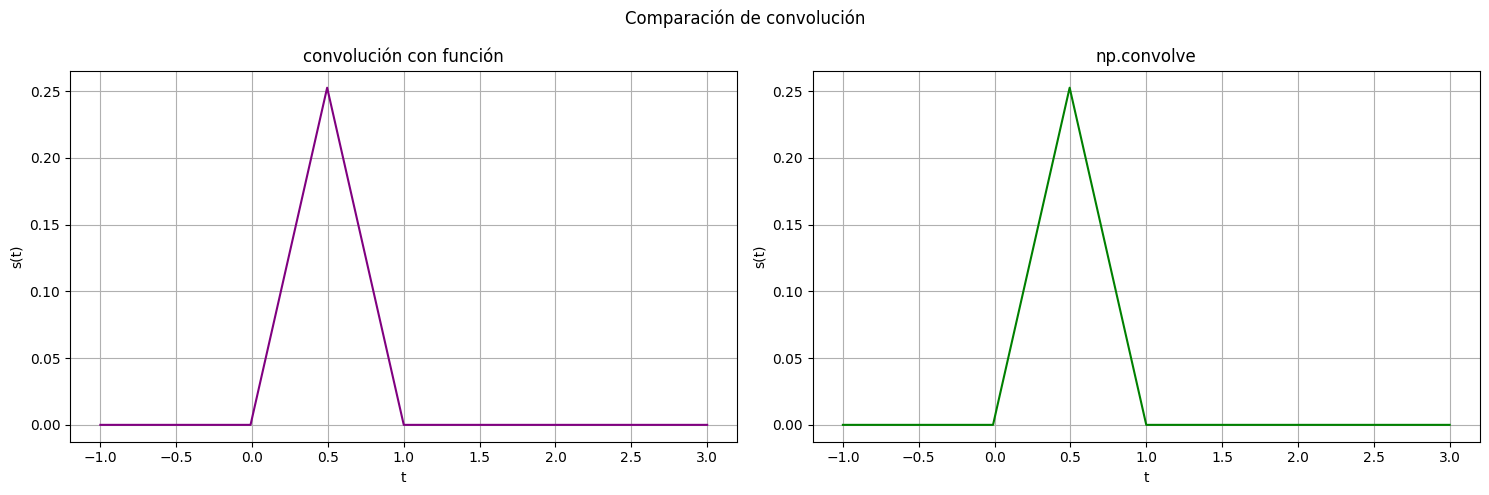

In [57]:
plt.figure(figsize=(15,5))

plt.suptitle('Comparación de convolución')

plt.subplot(1,2,1)
plt.title('convolución con función')
plt.xlabel("t")
plt.ylabel("s(t)")
plt.plot(t_conv,s*(t_conv[1]-t_conv[0]), c = 'purple')
plt.grid(True)

plt.subplot(1,2,2)
plt.title('np.convolve')
plt.xlabel("t")
plt.ylabel("s(t)")
plt.plot(t_conv,s_prueba*(t_conv[1]-t_conv[0]), c = 'green')
plt.grid(True)

plt.tight_layout()
plt.show()